### Number of Influenza-related pediatric deaths by Week of Death: 2015-16 to present

In [1]:
# import libraries and read the input data into a dataframe
library("ggplot2")
# for melt function
library("reshape2")

ped_deaths <- read.csv("./FluViewPhase2Data/Weekly_pediatric_deaths.csv", skip = 1)

Warning message:
"package 'ggplot2' was built under R version 3.5.2"Warning message:
"package 'reshape2' was built under R version 3.5.2"

In [3]:
# select columns needed for plotting
ped_deaths_df <- ped_deaths[, c("WEEK.NUMBER", "PREVIOUS.WEEK.DEATHS", "CURRENT.WEEK.DEATHS")]

### Clean week column for plotting and melt columns of data into rows to generate bar plot

#### Also generate aggregate data for number of deaths for each season to be displayed above the clusters of bars

In [4]:
week_factor = gsub("-", '', ped_deaths_df$WEEK.NUMBER )
# melt data for plotting bar plots
ped_deaths_df <- melt(ped_deaths_df, id="WEEK.NUMBER")

# for showing number of deaths above clusters of bars
deaths_by_season <- aggregate(PREVIOUS.WEEK.DEATHS+CURRENT.WEEK.DEATHS ~ SEASON, ped_deaths, sum)[, "PREVIOUS.WEEK.DEATHS + CURRENT.WEEK.DEATHS"]
seasons <- unique(ped_deaths$SEASON)

### Plot the bars using value column of the melted data which contains correponding values for number of deaths against each week 

#### Also use annotate() and deaths_by_season dataframe to display the summary statistic "Number of deaths per each season" and display the plot

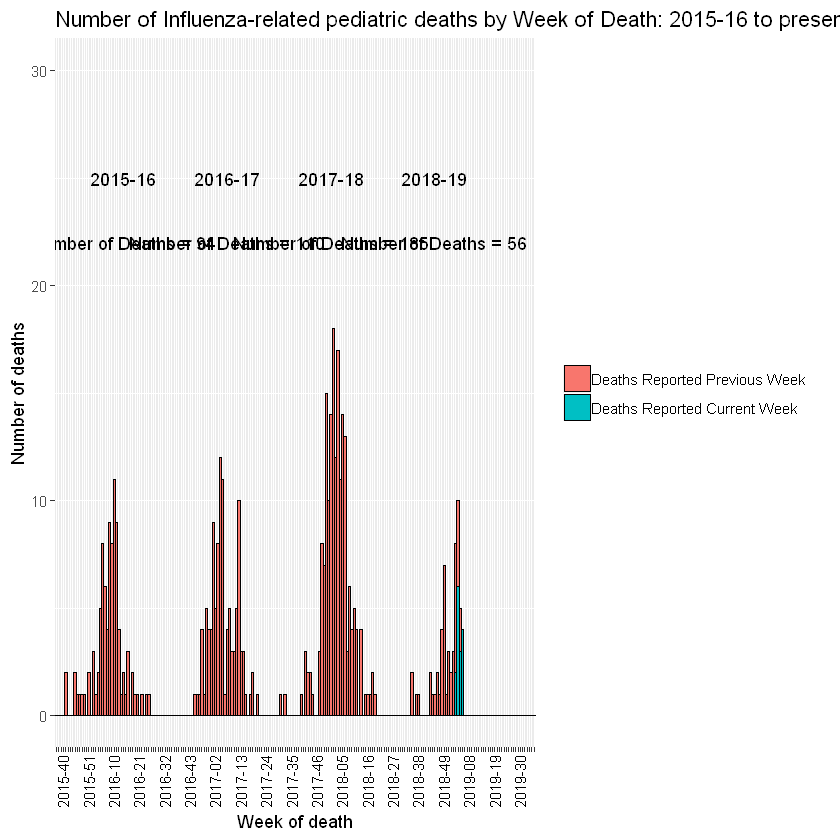

In [6]:
ped_plot <- ggplot(
  data = ped_deaths_df, 
  aes(WEEK.NUMBER, value, fill =  variable)) +
  geom_bar(stat = "identity", width = 1, colour="black") +
  ylab("Number of deaths") +
  xlab("Week of death") +
  ggtitle("Number of Influenza-related pediatric deaths by Week of Death: 2015-16 to present") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  scale_fill_discrete(labels = c("Deaths Reported Previous Week", "Deaths Reported Current Week")) +
  ylim(0, 30) +
  theme(legend.title=element_blank(), axis.text.x=element_text(color=c("black",rep("transparent", 10))))

x <- 30
y <- 25
i <- 0
for (season in deaths_by_season) {
  label <- as.character(seasons[i+1]) 
  ped_plot <- ped_plot + annotate("text", label = label , x = x+45*i, y = y, color = "black") +
    annotate("text", label = paste0("Number of Deaths = ", season), x = x+45*i, y = 22, color = "black")
  i <- i + 1
}

ped_plot